In [2]:
path = "C:/Users/FEZA/My Drive/00. Drive PC/1.STIS/5. Semester 5/Information Retrieval [IR] P/berita"


Casefolding

In [3]:
def case_folding(text):
    text = text.lower()
    return text

Tokenisasi

In [4]:
import nltk
# nltk.download('punkt') # Download data yang diperlukan untuk tokenisasi
from nltk.tokenize import word_tokenize
def tokenisasi(text):
    tokens = word_tokenize(text)
    return tokens

Eliminasi Stopword

In [5]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('Indonesian'))

In [6]:
def eliminasi_stopword(token):
    return [kata for kata in token if kata not in stop_words]

Stemming 

In [7]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
def stemming_sastrawi(tokens):
    # Membuat stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return [stemmer.stem(token) for token in tokens]

In [8]:

import re
import os
inverted_index = {}
doc_dict = {}
i = 1
for filename in os.listdir(path):
    if (filename.endswith('.txt')):
        file_path = os.path.join(path, filename)
        # Ekstrak angka dari nama file menggunakan regular expressions
        match = re.search(r'\d+', filename)
        if match:
            doc_id = match.group() # Mengambil angka dari nama file sebagai dokumen ID
            with open (file_path, mode='r', encoding='utf-8') as file:
                text = file.read()
                hasil_case_folding = case_folding(text)
                token = tokenisasi(hasil_case_folding)
                token_bersih = eliminasi_stopword(token)
                stemm_token = stemming_sastrawi(token_bersih)
                stemm_token_final = [item for item in stemm_token if item != ''] # membersihkan term kosong pada hasil stemming sebelumnya
                # Menggabungkan hasil stemming menjadi sebuah teks/paragraf
                doc_dict[doc_id] = ' '.join(stemm_token_final)
                for term in set(stemm_token_final): # penggunaan set untuk mengantisipasi duplikasi term pada sebuah dokumen
                    if term in inverted_index:
                        inverted_index[term].append(doc_id)
                    else:
                        inverted_index[term] = [doc_id]

In [9]:
inverted_index

{'zona': ['1'],
 'siti': ['1'],
 'health detik com berita-detikhealth d-5816690 wilayah-kamu-sudah-bebas-covid-19-cek-34-kabkota-zona-hijau-terbaru': ['1'],
 'longgar': ['1'],
 '-': ['1', '2', '3', '4', '5'],
 'signifikan': ['1', '4'],
 'picu': ['1'],
 'januari': ['1', '2'],
 'nadia': ['1'],
 'level': ['1'],
 'sakit': ['1'],
 'terap': ['1'],
 '24': ['1'],
 'direktur': ['1'],
 'tular': ['1'],
 'dr': ['1', '5'],
 'baru': ['1', '3', '4'],
 'https': ['1', '2', '3', '4', '5'],
 'tahap': ['1'],
 'masyarakat': ['1'],
 'bijak': ['1'],
 'menteri': ['1'],
 'tarmizi': ['1'],
 'hitung': ['1'],
 'hijau': ['1'],
 '2': ['1', '3'],
 'covid-19': ['1', '2', '3', '4', '5'],
 'cegah': ['1'],
 'kendali': ['1'],
 'bebas': ['1'],
 'p2pml': ['1'],
 'kemenkes': ['1', '4'],
 '2021': ['1'],
 '3': ['1'],
 'langsung': ['1'],
 '34': ['1'],
 'tingkat': ['1', '4'],
 'ppkm': ['1'],
 'sehat': ['1'],
 'ri': ['1', '3', '4'],
 'jakarta': ['1', '2', '3', '4', '5'],
 'laku': ['1'],
 'mobilitas': ['1'],
 'protokol': ['1'],
 

In [10]:
doc_dict

{'1': 'wilayah bebas covid-19 cek 34 kab kota zona hijau baru jakarta - perintah rencana terap laku batas giat masyarakat ppkm level 3 hitung 24 desember 2021 2 januari 2021 menteri sehat ri bijak ppkm level 3 tahap kaji direktur cegah kendali sakit tular langsung p2pml kemenkes ri dr siti nadia tarmizi ppkm level 3 terap covid-19 signifikan picu tingkat mobilitas longgar protokol sehat https health detik com berita-detikhealth d-5816690 wilayah-kamu-sudah-bebas-covid-19-cek-34-kabkota-zona-hijau-terbaru',
 '2': 'vaksin covid-19 rutin gantung jelas jakarta - beri booster dosis tiga vaksin covid-19 indonesia rencana januari 2022 lantas ada vaksinasi covid-19 vaksinasi influenza ketua satgas covid-19 ikat dokter indonesia idi prof zubairi djoerban pasti kait turut vaksin covid-19 booster vaksinasi covid-19 https health detik com berita-detikhealth d-5816582 vaksin-covid-19-bakal-rutin-setiap-tahun-tergantung-ini-penjelasannya',
 '3': 'ri suntik booster 2022 ampuh lawan varian delta cs ja

Vocabulary List dari Inverted Index

In [11]:
vocab = list(inverted_index.keys())
print(f'Vocabulary List: {vocab}')

Vocabulary List: ['zona', 'siti', 'health detik com berita-detikhealth d-5816690 wilayah-kamu-sudah-bebas-covid-19-cek-34-kabkota-zona-hijau-terbaru', 'longgar', '-', 'signifikan', 'picu', 'januari', 'nadia', 'level', 'sakit', 'terap', '24', 'direktur', 'tular', 'dr', 'baru', 'https', 'tahap', 'masyarakat', 'bijak', 'menteri', 'tarmizi', 'hitung', 'hijau', '2', 'covid-19', 'cegah', 'kendali', 'bebas', 'p2pml', 'kemenkes', '2021', '3', 'langsung', '34', 'tingkat', 'ppkm', 'sehat', 'ri', 'jakarta', 'laku', 'mobilitas', 'protokol', 'perintah', 'rencana', 'desember', 'wilayah', 'cek', 'kab kota', 'batas', 'kaji', 'giat', 'dokter', 'vaksin', 'ketua', 'satgas', 'zubairi', 'tiga', 'influenza', 'rutin', 'health detik com berita-detikhealth d-5816582 vaksin-covid-19-bakal-rutin-setiap-tahun-tergantung-ini-penjelasannya', 'pasti', 'lantas', '2022', 'kait', 'indonesia', 'beri', 'dosis', 'idi', 'djoerban', 'booster', 'ada', 'vaksinasi', 'gantung', 'ikat', 'prof', 'jelas', 'turut', 'riset', 'pfizer

Top 3 Document Retrieval

In [12]:
query = 'vaksin corona jakarta'

Membuat term frequency

In [13]:
def termFrequency(vocab, query): # term frequency berdasarkan query
    tf_query = {}
    for word in vocab:
        tf_query[word] = query.count(word)
    return tf_query

tf_query = termFrequency(vocab, query)
tf_query

{'zona': 0,
 'siti': 0,
 'health detik com berita-detikhealth d-5816690 wilayah-kamu-sudah-bebas-covid-19-cek-34-kabkota-zona-hijau-terbaru': 0,
 'longgar': 0,
 '-': 0,
 'signifikan': 0,
 'picu': 0,
 'januari': 0,
 'nadia': 0,
 'level': 0,
 'sakit': 0,
 'terap': 0,
 '24': 0,
 'direktur': 0,
 'tular': 0,
 'dr': 0,
 'baru': 0,
 'https': 0,
 'tahap': 0,
 'masyarakat': 0,
 'bijak': 0,
 'menteri': 0,
 'tarmizi': 0,
 'hitung': 0,
 'hijau': 0,
 '2': 0,
 'covid-19': 0,
 'cegah': 0,
 'kendali': 0,
 'bebas': 0,
 'p2pml': 0,
 'kemenkes': 0,
 '2021': 0,
 '3': 0,
 'langsung': 0,
 '34': 0,
 'tingkat': 0,
 'ppkm': 0,
 'sehat': 0,
 'ri': 0,
 'jakarta': 1,
 'laku': 0,
 'mobilitas': 0,
 'protokol': 0,
 'perintah': 0,
 'rencana': 0,
 'desember': 0,
 'wilayah': 0,
 'cek': 0,
 'kab kota': 0,
 'batas': 0,
 'kaji': 0,
 'giat': 0,
 'dokter': 0,
 'vaksin': 1,
 'ketua': 0,
 'satgas': 0,
 'zubairi': 0,
 'tiga': 0,
 'influenza': 0,
 'rutin': 0,
 'health detik com berita-detikhealth d-5816582 vaksin-covid-19-bakal

Membuat Word Document Frequency

In [14]:
def wordDocFre(vocab, doc_dict):
    df = {}
    for word in vocab:
        frq = 0
        for doc in doc_dict.values():
            if word in tokenisasi(doc):
                frq = frq + 1
        df[word] = frq
    return df

Membuat IDF

In [15]:
import numpy as np
def inverseDocFre(vocab, doc_fre, length): # fungsi untuk menghasilkan idf
    idf = {}
    for word in vocab:
        idf[word] = 1 + np.log((length + 1) / (doc_fre[word]+1))
    return idf

In [16]:
def termFrequencyInDoc(vocab, doc_dict):
    tf_docs = {}
    for doc_id in doc_dict.keys():
        tf_docs[doc_id] = {}
    for word in vocab:
        for doc_id, doc in doc_dict.items():
            tf_docs[doc_id][word] = doc.count(word)
    return tf_docs

TF-IDF

In [17]:
def tfidf(vocab, tf, idf_scr, doc_dict):
    tf_idf_scr = {}
    for doc_id in doc_dict.keys():
        tf_idf_scr[doc_id] = {}
    for word in vocab:
        for doc_id, doc in doc_dict.items():
            tf_idf_scr[doc_id][word] = tf[doc_id][word] * idf_scr[word]
    return tf_idf_scr

In [18]:
import math
def cosine_sim(vec1, vec2):
    vec1 = list(vec1)
    vec2 = list(vec2)
    dot_prod = 0
    for i, v in enumerate(vec1):
        dot_prod += v * vec2[i]
    mag_1 = math.sqrt(sum([x**2 for x in vec1]))
    mag_2 = math.sqrt(sum([x**2 for x in vec2]))
    # Menggunakan numpy.asscalar() untuk mengubah array menjadi scalar
    mag_1 = np.squeeze(mag_1)
    mag_2 = np.squeeze(mag_2)
    return dot_prod / (mag_1 * mag_2)

In [19]:
from collections import OrderedDict
def topk(doc_dict, TD, q, k):
    relevance_scores = {}
    i = 0
    for doc_id in doc_dict.keys():
        relevance_scores[doc_id] = cosine_sim(q, TD[:, i])
        i = i + 1
        
    sorted_value = OrderedDict(sorted(relevance_scores.items(), key=lambda x: x[1], reverse = True))
    top_k = {j: sorted_value[j] for j in list(sorted_value)[:k]}
    # penghitungan time complexity (disusun oleh banyak dokumen + proses pengurutan + seleksi top k)
    time_complexity_k = len(doc_dict) + (len(doc_dict) * (len(doc_dict).bit_length() - 1)) + k
    return top_k, time_complexity_k

In [20]:
def retriev(vocab, query, doc_dict, k):
    tf_query = termFrequency(vocab, query)
    idf = inverseDocFre(vocab, wordDocFre(vocab, doc_dict), len(doc_dict))
   

    TQ = np.zeros((len(vocab), 1))

    for word in vocab: # iterasi untuk pemobobotan tf-idf term-query matriks
        ind1 = vocab.index(word) # memberikan index pada tiap kata pada vocab
        TQ[ind1][0] = tf_query[word]*idf[word]

    # implementasi fungsi pembobotan tf-idf antara tiap term dalam vocab dan tiap dokumen di dalam corpus untuk digunakan dalam konstruksi term-document matriks
    tf_idf = tfidf(vocab, termFrequencyInDoc(vocab, doc_dict), idf, doc_dict)

    # inisialisasi term-query matriks dengan matriks 0 dengan banyak baris sebanyak len(vocab) dan banyak kolom sebanyak len(doc_dict)
    TD = np.zeros((len(vocab), len(doc_dict)))
    for word in vocab: # iterasi untuk konstruksi term-document matriks
        for doc_id, doc in tf_idf.items():
            ind1 = vocab.index(word)
            ind2 = list(tf_idf.keys()).index(doc_id)
            TD[ind1][ind2] = tf_idf[doc_id][word]

    # implementasi fungsi pemilihan top k dokumen beserta penghitungan time complexitinya
    top_k_results, complexity_k = topk(doc_dict, TD, TQ, k)

    # penghitungan time complexity (disusun oleh penghitungan tf_query + pembuatan TQ + penghitungan tf-idf + pembuatan TD + penghitungan top k)
    time_complexity_main = len(vocab) + len(vocab) + (len(vocab) * len(doc_dict)) + (len(vocab) * len(doc_dict)) + len(doc_dict) + complexity_k
    
    return top_k_results, TQ, TD, time_complexity_main

In [22]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
DT = TD.transpose()
print(DT)
model = TruncatedSVD(n_components=2, random_state=7).fit(DT)
DT_reduced = model.transform(DT)
QT_reduced = model.transform(TQ.transpose())
print(QT_reduced)
print(DT_reduced)
plt.scatter(DT_reduced[:, 0], DT_reduced[:, 1])
plt.scatter(QT_reduced[:, 0], QT_reduced[:, 1], color=["red"])
labels=list(doc_dict.keys())
for i, txt in enumerate(labels):
    plt.annotate(txt, (DT_reduced[i, 0], DT_reduced[i, 1]))
plt.annotate("query", (QT_reduced[0, 0], QT_reduced[0, 1]))
plt.show()


NameError: name 'TD' is not defined

In [ ]:
k = 3
top_3_result, TQ, TD, time = retriev(vocab, query, doc_dict, k)
print(f'Term-query matriks:\n{TQ}')
print(f'\nTerm-document matriks:\n{TD}')
print(f'\nHasil perankingan top {k} dokumen:')

i = 1
for no_doc, cosine_similarity in top_3_result.items():
    print(f'{i}. Dokumen {no_doc} dengan nilai cosine similarity = {cosine_similarity}')
    i += 1

Term-query matriks:
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]


# Penugasan Praktikum 6

Evaluasi untuk Unranked Retrieval Set

Mencari skor Precision dan Recall

In [ ]:
def main_unranked(rel_docs):
    retrieved_rel_doc3 = [value for value in list(top_3_result.keys()) if value in rel_docs]
    precission = len(retrieved_rel_doc3)/len(top_3_result)*100
    recall = len(retrieved_rel_doc3)/len(rel_docs)*100
    f1Score = 2 * precission * recall / (precission + recall)
    return precission, recall, f1Score

Dokumen sebenarnya yang sesuai query berdasarkan relevance judgement yaitu berita2 dan berita3.

In [ ]:
rel_judgement = {
'1': 0,
'2': 1,
'3': 1,
'4': 0,
'5': 0,
}

rel_docs = [] # inisilisasi list kosong untuk menyimpan dokumen yang relevan
for doc_id, rel in rel_judgement.items():
    if rel==1:
        rel_docs.append(doc_id)

precission, recall, f1score = main_unranked(rel_docs)
print('Metrik evaluasi untuk unranked retrieval set adalah sebagai berikut:')
print(f'Nilai precission: {precission}\nNilai recall: {recall}\nNilai F1-score: {f1score}')

Metrik evaluasi untuk unranked retrieval set adalah sebagai berikut:
Nilai precission: 66.66666666666666
Nilai recall: 100.0
Nilai F1-score: 80.0


Pada kode di atas, variabel dictionary rel_judgement digunakan untuk memberi kode pada berita2 dan berita 3 karena berita tersebut merupakan berita relevan berdasarkan relevance judgment.

Evaluasi untuk Ranked Retrieval Set

In [ ]:
import numpy as np
def compute_prf_metrics(I, score, I_Q):
    """Compute precision, recall, F-measures and other
    evaluation metrics for document-level retrieval

    Notebook: C7/C7S3_Evaluation.ipynb

    Args:
        I (np.ndarray): Array of items
        score (np.ndarray): Array containing the score values of the times
        I_Q (np.ndarray): Array of relevant (positive) items

    Returns:
        P_Q (float): Precision
        R_Q (float): Recall
        F_Q (float): F-measures sorted by rank
        BEP (float): Break-even point
        F_max (float): Maximal F-measure
        P_average (float): Mean average
        X_Q (np.ndarray): Relevance function
        rank (np.ndarray): Array of rank values
        I_sorted (np.ndarray): Array of items sorted by rank
        rank_sorted (np.ndarray): Array of rank values sorted by rank
    """
    # Compute rank and sort documents according to rank
    K = len(I)
    index_sorted = np.flip(np.argsort(score))
    I_sorted = I[index_sorted]
    rank = np.argsort(index_sorted) + 1
    rank_sorted = np.arange(1, K+1)

    # Compute relevance function X_Q (indexing starts with zero)
    # X_Q = np.zeros(K, dtype=bool)
    # for i in range(K):
    #     if I_sorted[i] in I_Q:
    #         X_Q[i] = True
    X_Q = np.isin(I_sorted, I_Q)
    # P_Q = np.cumsum(X_Q) / np.arange(1, K+1)

    # Compute precision and recall values (indexing starts with zero)
    M = len(I_Q)
    # P_Q = np.zeros(K)
    # R_Q = np.zeros(K)
    # for i in range(K):
    #     r = rank_sorted[i]
    #     P_Q[i] = np.sum(X_Q[:r]) / r
    #     R_Q[i] = np.sum(X_Q[:r]) / M
    P_Q = np.cumsum(X_Q) / np.arange(1, K+1)
    R_Q = np.cumsum(X_Q) / M

    # Break-even point
    BEP = P_Q[M-1]
    # Maximal F-measure
    sum_PR = P_Q + R_Q
    sum_PR[sum_PR == 0] = 1  # Avoid division by zero
    F_Q = 2 * (P_Q * R_Q) / sum_PR
    F_max = F_Q.max()
    # Average precision
    P_average = np.sum(P_Q * X_Q) / len(I_Q)

    return P_Q, R_Q, F_Q, BEP, F_max, P_average, X_Q, rank, I_sorted, rank_sorted

In [ ]:
import pandas as pd
relevance_scores = {}
i = 0
for doc_id in doc_dict.keys():
    relevance_scores[doc_id] = cosine_sim(TQ, TD[:, i])
    i = i + 1
    
# mengubah value dari dictionary relevance_scores menjadi float
for key, value in relevance_scores.items():
    relevance_scores[key] = float(value[0])

I = np.array(list(relevance_scores.keys()))
score = np.array(list(relevance_scores.values()))
I_Q = np.array(['2', '3'])
output = compute_prf_metrics(I, score, I_Q)
P_Q, R_Q, F_Q, BEP, F_max, P_average, X_Q, rank, I_sorted, rank_sorted = output

# Arrange output as tables
score_sorted = np.flip(np.sort(score))
df = pd.DataFrame({'Rank': rank_sorted, 'ID': I_sorted, 'Score': score_sorted, '$\chi_\mathcal{Q}$': X_Q, 'P(r)': P_Q, 'R(r)': R_Q, 'F(r)': F_Q})
print(df)
print('Break-even point = %.2f' % BEP)
print('F_max = %.2f' % F_max)
print('Average precision =', np.round(P_average, 5))

   Rank ID     Score  $\chi_\mathcal{Q}$      P(r)  R(r)      F(r)
0     1  2  0.228528                True  1.000000   0.5  0.666667
1     2  3  0.166147                True  1.000000   1.0  1.000000
2     3  5  0.073747               False  0.666667   1.0  0.800000
3     4  4  0.051724               False  0.500000   1.0  0.666667
4     5  1  0.011144               False  0.400000   1.0  0.571429
Break-even point = 1.00
F_max = 1.00
Average precision = 1.0


Pada hasil di atas, diperoleh hasil relevance score untuk masing-masing dokumen

In [ ]:
from matplotlib import pyplot as plt
def plot_PR_curve(P_Q, R_Q, figsize=(3, 3)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    plt.plot(R_Q, P_Q, linestyle='--', marker='o', color='k', mfc='r')
    plt.xlim([0, 1.1])
    plt.ylim([0, 1.1])
    ax.set_aspect('equal', 'box')
    plt.title('PR curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid()
    plt.tight_layout()
    ax.plot(BEP, BEP, color='green', marker='o', fillstyle='none', markersize=15)
    ax.set_title('PR curve')
    plt.show()
    return fig, ax

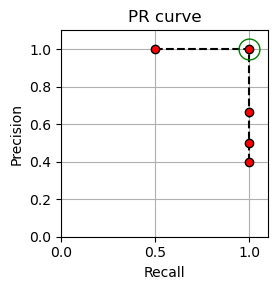

(<Figure size 300x300 with 1 Axes>,
 <Axes: title={'center': 'PR curve'}, xlabel='Recall', ylabel='Precision'>)

In [ ]:
plot_PR_curve(P_Q, R_Q, figsize=(3,3))